# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(3)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [64]:
#seu código aqui
df.dtypes
df.info
df['Churn']=df['Churn'].str.replace ('Yes','1', regex=False)
df['Churn']=df['Churn'].str.replace ('No','0', regex=False)

df.dtypes


customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [22]:
#seu código aqui

df.isnull().sum()/ len(df)*100





customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [ ]:
#seu código aqui
df.dropna(subset=['Genero', 'Churn'], inplace=True)
# Foi feito a eliminação dos valores nulos do 'Genero' e 'Churn', pois ambos corresponde menos de 1%
df.head(3)

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

(array([482.,  56., 110., 486., 152., 271., 310., 288., 231., 102.]),
 array([ 18.,  28.,  38.,  48.,  58.,  68.,  78.,  88.,  98., 108., 118.]),
 <BarContainer object of 10 artists>)

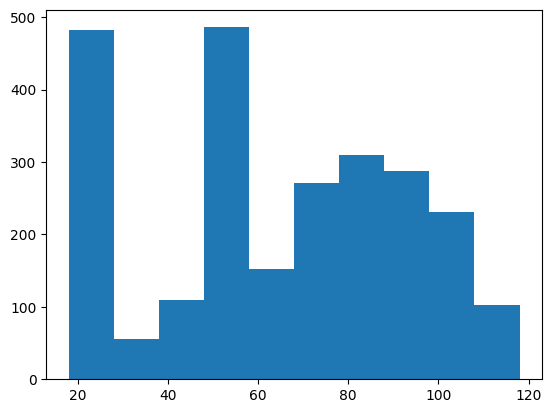

In [61]:
#seu código aqui
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(0).astype(int)
variavel =df['Pagamento_Mensal'].median()
df['Pagamento_Mensal'].median()
df['Pagamento_Mensal']=df['Pagamento_Mensal'].replace (0,variavel, regex=False)
plt.hist(df['Pagamento_Mensal'])
# Como a média e a mediana estão muito próximas usando qualquer uma das duas teremos um resultado similar

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [85]:
#seu código aqui
df['Servico_Internet'].unique()
df['Servico_Internet']=df['Servico_Internet'].str.replace ('dsl','DSL', regex=False)
df['Servico_Internet'].unique()

df['Casado'].unique()

df['Servico_Seguranca'].unique()
df['Servico_Seguranca']=df['Servico_Seguranca'].str.replace ('No internet service','No', regex=False)
df['Servico_Seguranca'].unique()

df['PaymentMethod'].unique()


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand

In [94]:
df.head(3)
df.rename(columns={
    'customerID': 'Identidade',
    'PhoneService': 'Servico_Telefone',
    'StreamingTV': 'TVporassinatura',
    'PaymentMethod': 'MetodosdePagamento'
}, inplace=True)
df.head(3)

,Identidade,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,Servico_Telefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,TVporassinatura,Tipo_Contrato,metodosdepagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
